In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('results/download/throughput/peerProxyThroughput.csv')
df

,Size (bytes),Size (readable),Time (ms),mb/s
0,0,NaN undefined,15.8,0.000000
1,0,NaN undefined,7.8,0.000000
2,0,NaN undefined,9.4,0.000000
3,0,NaN undefined,6.2,0.000000
4,0,NaN undefined,8.0,0.000000
...,...,...,...,...
495,4950000,4.72 MB,1793.7,2.759659
496,4950000,4.72 MB,1616.3,3.062550
497,4950000,4.72 MB,1821.7,2.717242
498,4950000,4.72 MB,1823.4,2.714709


In [15]:


def makeScatter(df, testname):
    df['Size (mb)'] = df['Size (bytes)'] * 1e-6

    # Prepare the data for linear regression (flipping axes: Size as X and Time as Y)
    X = df['Size (mb)'].values.reshape(-1, 1)
    y = df['Time (ms)'].values

    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Calculate predictions and R^2
    y_pred = model.predict(X)
    r_squared = model.score(X, y)

    # Plot the data and the fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Size (mb)'], df['Time (ms)'], label='Original Data', marker='o')
    plt.plot(df['Size (mb)'], y_pred, color='red', linestyle='--', label='Fitted Line')
    plt.title(f'{testname} Time (ms) vs Size (mb) ')
    plt.xlabel('Size (mb)')
    plt.ylabel('Time (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the results
    print(f'Intercept (base latency): {model.intercept_}')
    print(f'Slope: {model.coef_[0]}')
    print(f'R^2: {r_squared}')

    # calculate mb/s from slope
    slope = model.coef_[0]

    # slope is ms/mb -> mb / s

    mb_per_s = 1 / (slope * 1e-3)
    print(f'MB/s: {mb_per_s}')


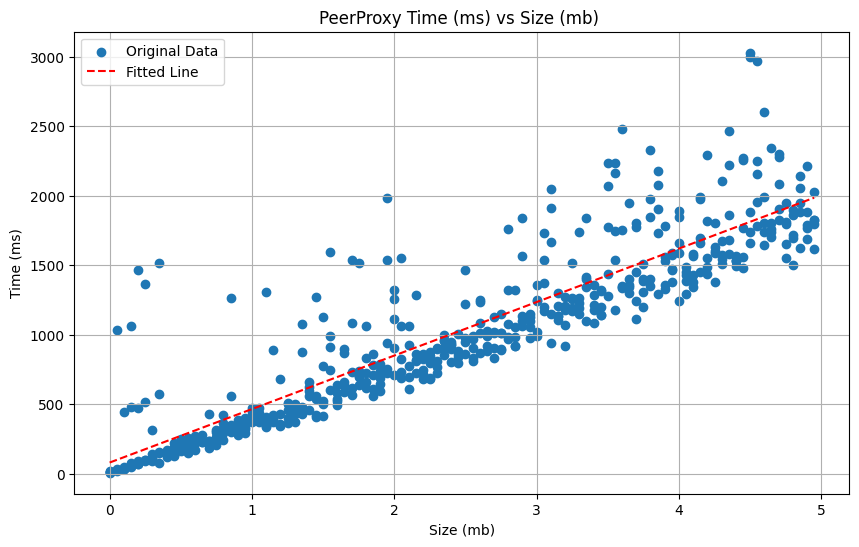

Intercept (base latency): 79.31556435643574
Slope: 384.86013561356134
R^2: 0.7918848925284818
MB/s: 2.59834653543879


In [16]:
makeScatter(df, 'PeerProxy')

In [17]:
ngrokDf = pd.read_csv('results/download/throughput/ngrokThroughput.csv')
ngrokDf

,Size (bytes),Size (readable),Time (ms),mb/s
0,0,NaN undefined,38.1,0.000000
1,0,NaN undefined,35.5,0.000000
2,0,NaN undefined,35.3,0.000000
3,0,NaN undefined,35.0,0.000000
4,0,NaN undefined,34.8,0.000000
...,...,...,...,...
495,4950000,4.72 MB,368.4,13.436482
496,4950000,4.72 MB,394.0,12.563452
497,4950000,4.72 MB,364.5,13.580247
498,4950000,4.72 MB,394.6,12.544349


In [18]:
# average mb/s
ngrokDf['mb/s'].mean()

11.029437894358527

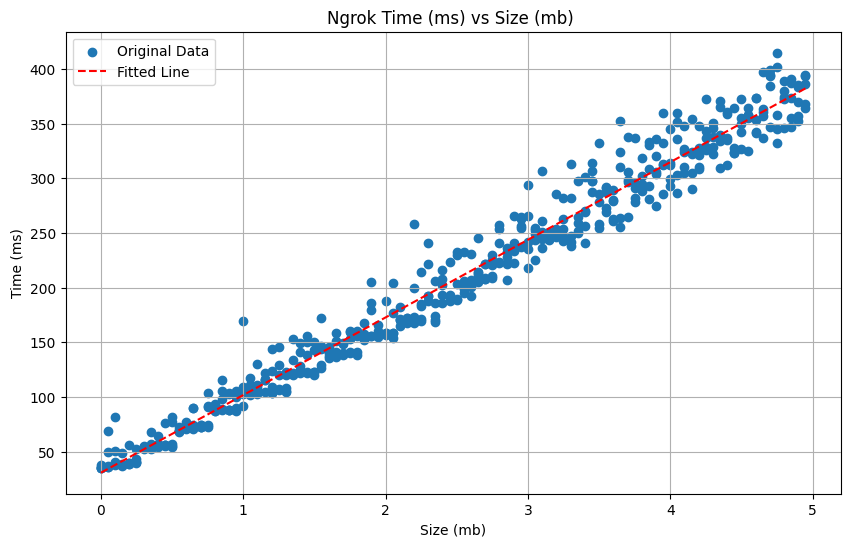

Intercept (base latency): 30.63182574257428
Slope: 71.03021182118212
R^2: 0.9732177277005137
MB/s: 14.078516371561589


In [19]:
makeScatter(ngrokDf, 'Ngrok')

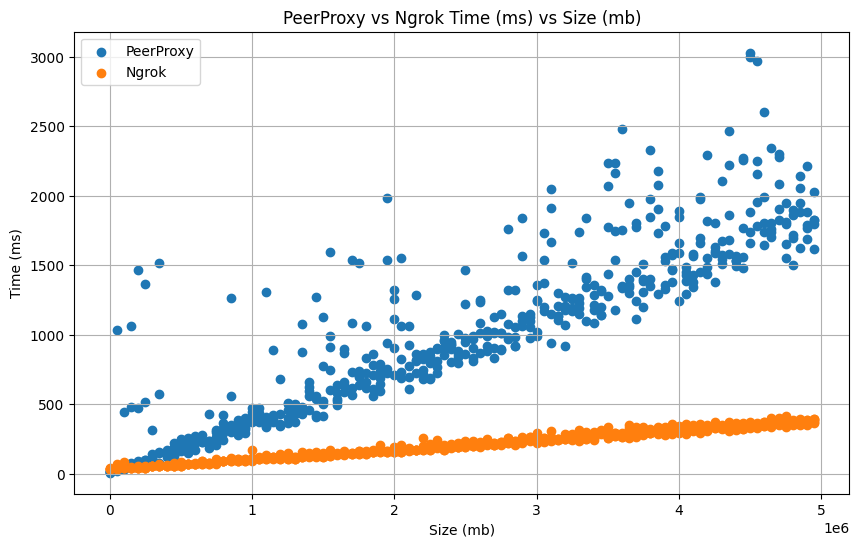

In [20]:
def plot_multiple_dfs(dfs, labels, title):

    plt.figure(figsize=(10, 6))
        
    for i, df in enumerate(dfs):
        plt.scatter(df['Size (bytes)'], df['Time (ms)'], label=labels[i], marker='o')
    
    plt.title(title)
    plt.xlabel('Size (mb)')
    plt.ylabel('Time (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_multiple_dfs([df, ngrokDf], ['PeerProxy', 'Ngrok'], 'PeerProxy vs Ngrok Time (ms) vs Size (mb)')

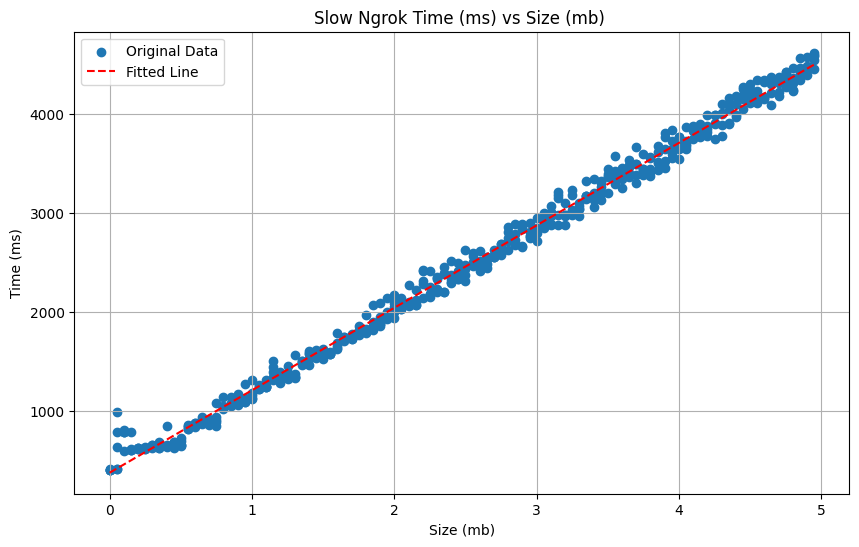

Intercept (base latency): 376.4337821782183
Slope: 833.3289768976897
R^2: 0.9941159058251596
MB/s: 1.200006273300122


In [21]:
slowNgrok = pd.read_csv('results/download/throughput/slowNgrok.csv')

makeScatter(slowNgrok, 'Slow Ngrok')

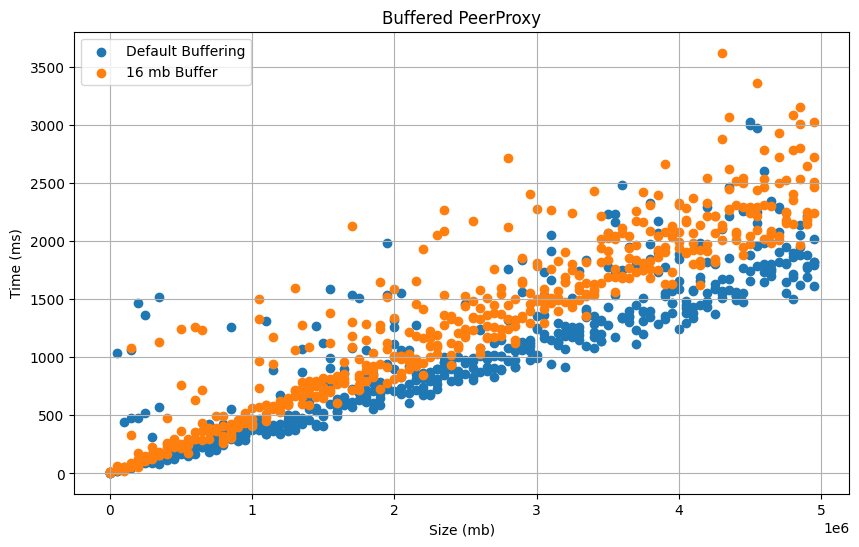

In [22]:
bufferedPeerProxy = pd.read_csv('results/download/throughput/increasedBufferThroughput.csv')

plot_multiple_dfs([df, bufferedPeerProxy], ['Default Buffering', '16 mb Buffer'], 'Buffered PeerProxy')

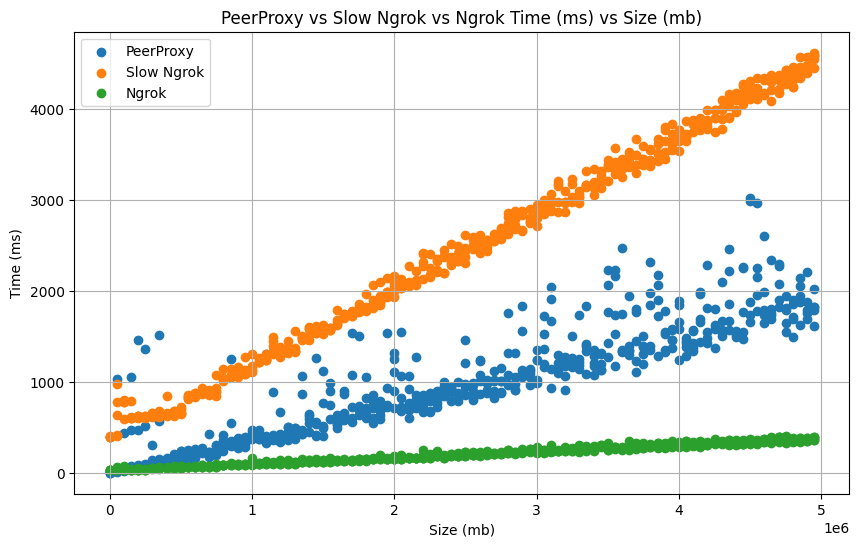

In [23]:
plot_multiple_dfs([df, slowNgrok, ngrokDf], ['PeerProxy', 'Slow Ngrok', 'Ngrok'], 'PeerProxy vs Slow Ngrok vs Ngrok Time (ms) vs Size (mb)')

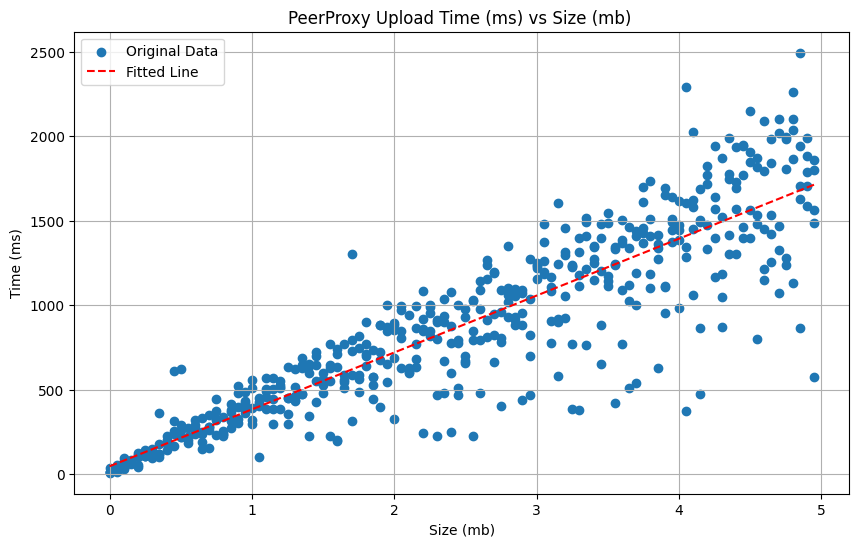

Intercept (base latency): 46.10973861386151
Slope: 336.96810561056105
R^2: 0.7916424984583188
MB/s: 2.9676399141339345


In [26]:
upload = pd.read_csv('results/upload/throughput/peerProxyThroughputUp.csv')

makeScatter(upload, 'PeerProxy Upload')

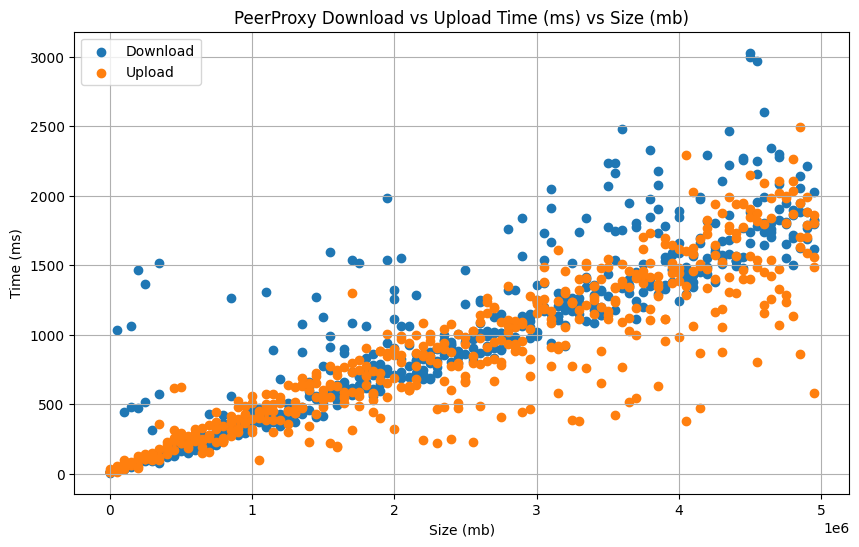

In [27]:
# plot upload and download for peerproxy
plot_multiple_dfs([df, upload], ['Download', 'Upload'], 'PeerProxy Download vs Upload Time (ms) vs Size (mb)')

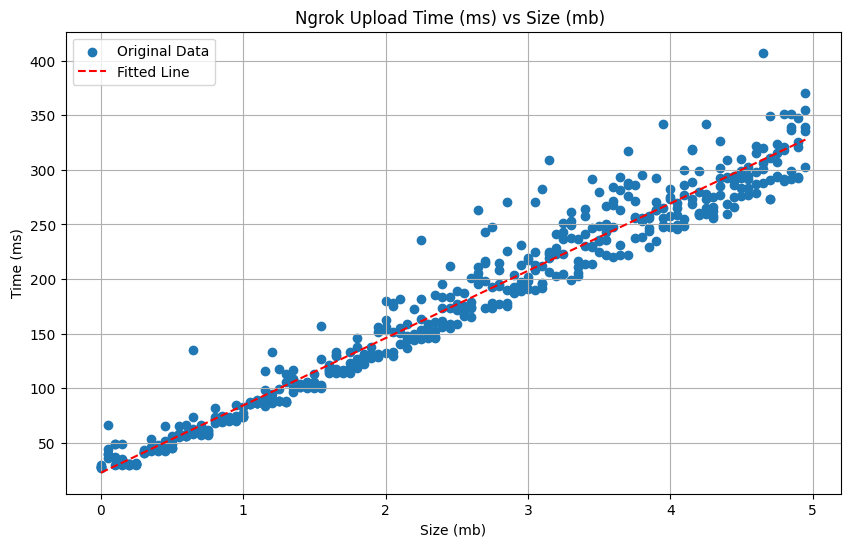

Intercept (base latency): 22.717980198019802
Slope: 61.6080888088809
R^2: 0.9544120946712153
MB/s: 16.23163482805278


In [30]:
ngrokUpload = pd.read_csv('results/upload/throughput/ngrokThroughputUp.csv')

makeScatter(ngrokUpload, 'Ngrok Upload')